In [30]:
from sklearn.pipeline import Pipeline
import helpers
from preprocess_data import DataPreprocessor
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

data_preprocessor = DataPreprocessor()

X_train, X_test, Y_train, Y_test = data_preprocessor.preprocess_data(lot_frontage_threshold=13)

# MIN 1872
# MAX 2010
# Logical binning of YearBuilt required.

model_pipeline = Pipeline(steps=[
    ('preprocessor', helpers.generate_preprocessor(
        ordinal_cats_ordered=helpers.get_ordinal_cats_ordered(),
        categorical_cols_ordinal=helpers.get_categorical_cols_ordinal(),
        numerical_cols=helpers.get_numeric_cols(),
    ))
])
model_pipeline.set_output(transform="pandas")
col_names = X_train.columns
col_names = [col.replace("remainder__", "") for col in col_names]
#X_train.columns = col_names
#X_train = model_pipeline.fit_transform(X_train)
to_remove = []
print("Total sample size: ", len(X_train))
for col in X_train.columns:
    if col.startswith('ohe__'):
        if sum(X_train[col]) <= 1:
            to_remove.append(col)

#print(to_remove)
X_train = X_train.drop(to_remove, axis=1)

Calculated Global Median Ratio: 0.7235 (from 951 samples)
Calculating for group level: 3way (['MSZoning', 'BldgType', 'LotShape'])
 -> Found 39 groups for 3way
Calculating for group level: 2way_ZS (['MSZoning', 'LotShape'])
 -> Found 16 groups for 2way_ZS
Calculating for group level: 2way_ZB (['MSZoning', 'BldgType'])
 -> Found 19 groups for 2way_ZB
Calculating for group level: 2way_BS (['BldgType', 'LotShape'])
 -> Found 14 groups for 2way_BS
Calculating for group level: 1way_Z (['MSZoning'])
 -> Found 5 groups for 1way_Z
Calculating for group level: 1way_B (['BldgType'])
 -> Found 5 groups for 1way_B
Calculating for group level: 1way_S (['LotShape'])
 -> Found 4 groups for 1way_S
2010
Total sample size:  1168


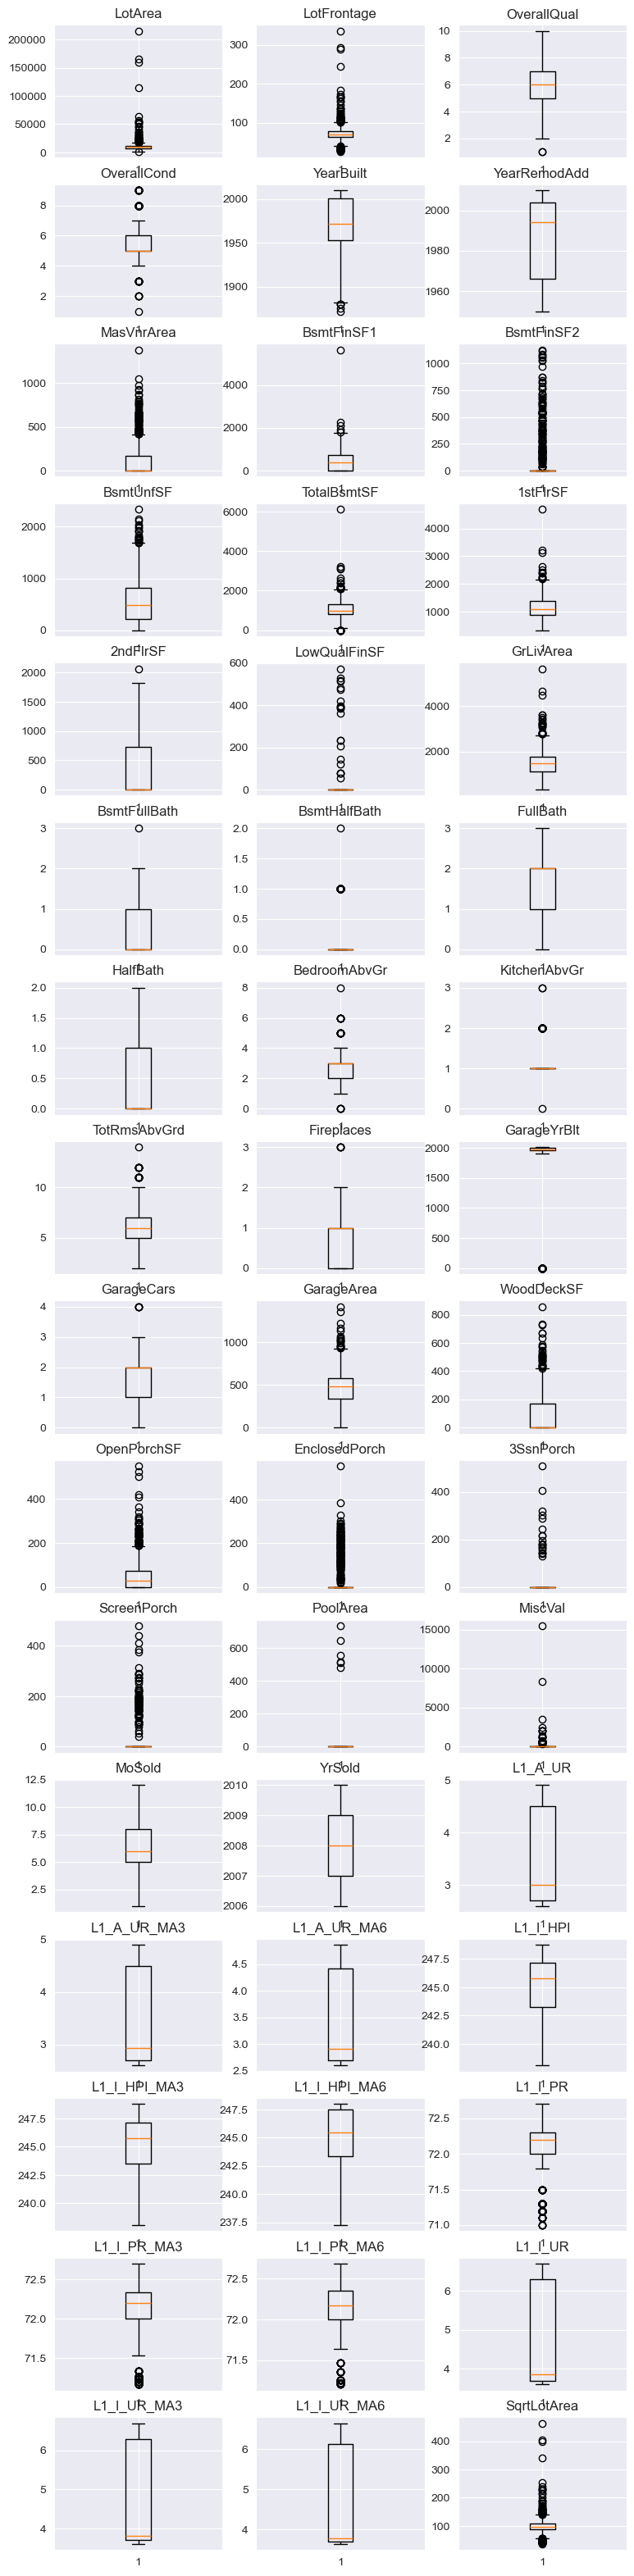

In [42]:
num_cols = helpers.get_numeric_cols()
fig, axes = plt.subplots(nrows=16, ncols=3, figsize=(9, 40))
axes = axes.flatten()
for i in range(0, 48):
    col_name = num_cols[i]
    axes[i].boxplot(X_train[col_name]) # Needing the name set here, either x axis name, or title
    axes[i].set_title(col_name)

# From this I realize a few things:
# I need to encode OverallQual, OverallCond as ordinal,
# YearBuilt to potentially be transformed into "BuildingAge"
# YearRemodAdd to potentially be transformed into "YearsSinceRemodel"
# Garage yr built to be GarageAge instead.
# Bath related items to be encoded nominally, due to their overall significance as categories.
# Bedrooms above ground to be encoded nominally. You typically see "3-bedroom house", "4-bedroom house", etc.
# Rather than "A house with 4 bedrooms".
# PoolArea to be "HasPool" instead.
# Due to MoSold having a lower IQR than expected (indicating seasonal behavior), I might encode this using sine and cosine instead.
# YrSold can be minmax scaled, Z-score normalization doesn't make sense for this one. Could also be
# YearsSinceSale.
# Macroeconomic data might be better off with MinMax scaling, z-score normalization doesn't make much sense here.
